# Stationary Transformation

## why stationary transformation matters

A great explaination of time series analysis and the importance of stationary data can be found [here](https://chih-ling-hsu.github.io/2017/03/20/time-series).<br>
In summary, in order for our time series forecasting to be effective, our data has to be stationary. In order to be stationary: 
1. The mean of the series should be a constant of 0
2. The variance should be the same over time
3. The covariance should be the same over time

[see this picture as an example](https://i.imgur.com/3lKCxEn.png)

# ways to make stationary

1. log()

Taking the log of data ia a good way to convert data with an exponential distribution into a <br>
linear distribution and it also helps to stabilize the variance over time. Vector autoregression <br>
is a linear model and taking the log enables us to describe an exponential distribution in linear terms.
         
2. differencing

Taking the difference of consecutive data points is another way to make data stationary. DIfferencing<br>
helps to stabilize the mean of a time series by removing changes to the level of a time series, thus <br>
reducing seasonality and trends.
        
3. log & differencing

Taking the log of data and then differencing is the same thing as log returns, or difference in log over<br>
a time period. Log returns are an industry standard in finance for good reason. Log returns are similar <br>
to scaled percent returns but there are some important differences. Log returns are additive while scaled<br> 
percent returns are not. In other words, the five-day log return is equal to the sum of five one-day log <br>
returns.In addition, log returns are symmetrical with respect to gains and losses, where scaled percent <br>
returns are biased in favor of gains. For example, if a stock goes down 50%(-0.5 scaled percent) and then<br>
goes up 200% (2.0 scaled percent), the stock is back where it started. If the same situation happened in <br>
log, we would first see a log return of log(0.5) = -0.301 followed by log(2) = 0.301.

In [ ]:
# import packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [2]:
# import data
df = pd.read_csv('formatted_data_all.csv', index_col = 0)
df.tail()

,price,volatility,volume_price,volume_number,positive_comment,neutral_comment,negative_comment
Date,,,,,,,
2021-06-26,1829.239258,0.071407,20637542361,1.128204e+07,259.0,131.0,122.0
2021-06-27,1978.894653,0.085256,19885474742,1.004878e+07,257.0,112.0,111.0
2021-06-28,2079.657471,0.084721,25514602841,1.226866e+07,218.0,103.0,87.0
2021-06-29,2160.768311,0.076824,24815124419,1.148440e+07,303.0,141.0,144.0
2021-06-30,2274.547607,0.084513,25828056268,1.135525e+07,92.0,29.0,23.0


In [3]:
# do both of these to make stationary transformation step easier
# cant have any values nan, inf or 0 for tests to work
# fill na
df = df.fillna(1)
# fill value '0' with '1'
df = df.replace(0, 1)
df.head()

,price,volatility,volume_price,volume_number,positive_comment,neutral_comment,negative_comment
Date,,,,,,,
2021-01-01,730.367554,0.040267,13652004358,1.869196e+07,109.0,59.0,40.0
2021-01-02,774.534973,0.088684,19740771179,2.548726e+07,153.0,93.0,53.0
2021-01-03,975.507690,0.240904,45200463368,4.633532e+07,328.0,220.0,143.0
2021-01-04,1040.233032,0.231567,56945985763,5.474349e+07,224.0,133.0,100.0
2021-01-05,1100.006104,0.129599,41535932781,3.775973e+07,194.0,114.0,78.0


<AxesSubplot:xlabel='Date'>

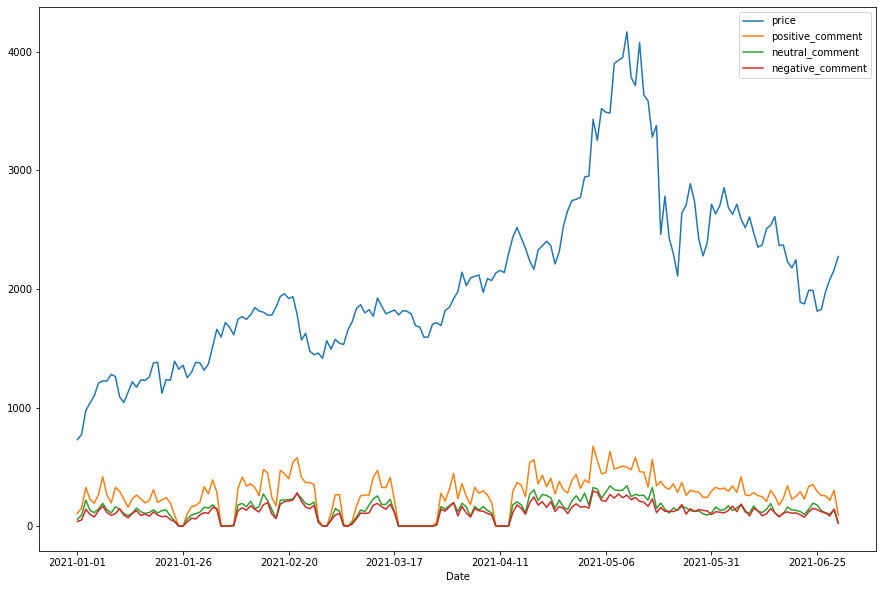

In [5]:
gdf=df[['price','positive_comment','neutral_comment','negative_comment']]
gdf.head()
gdf.plot(figsize=(15,10))


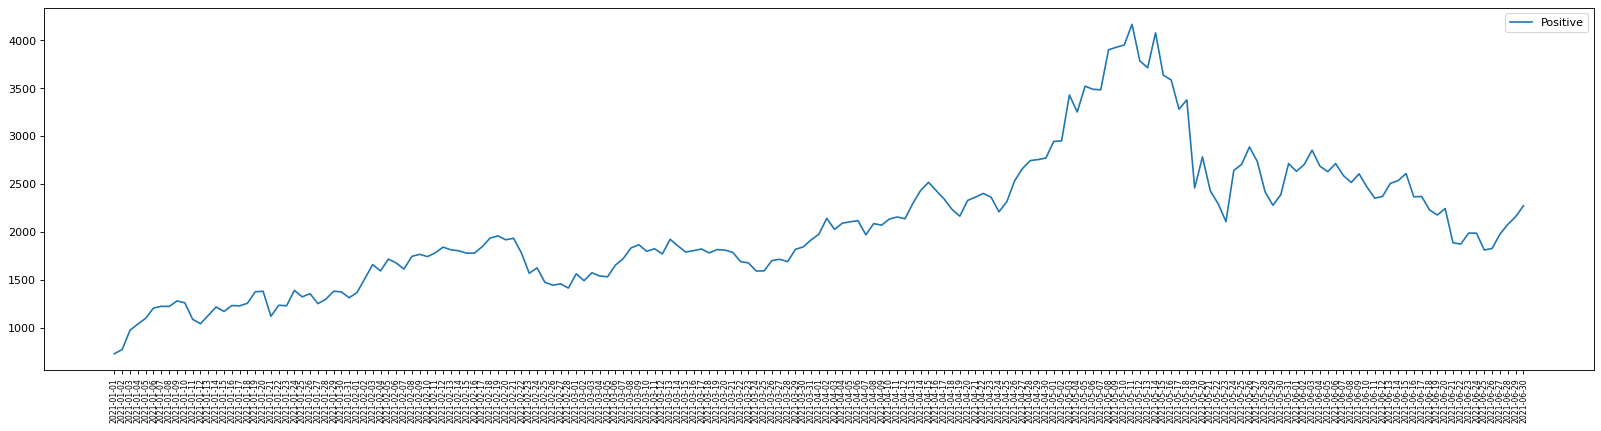

In [6]:
from matplotlib.pyplot import figure
figure(figsize = (25, 6), dpi = 80)
plt.plot(gdf.index,gdf['price'],label='Positive')
plt.xticks(fontsize=7,rotation=90)
plt.legend()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

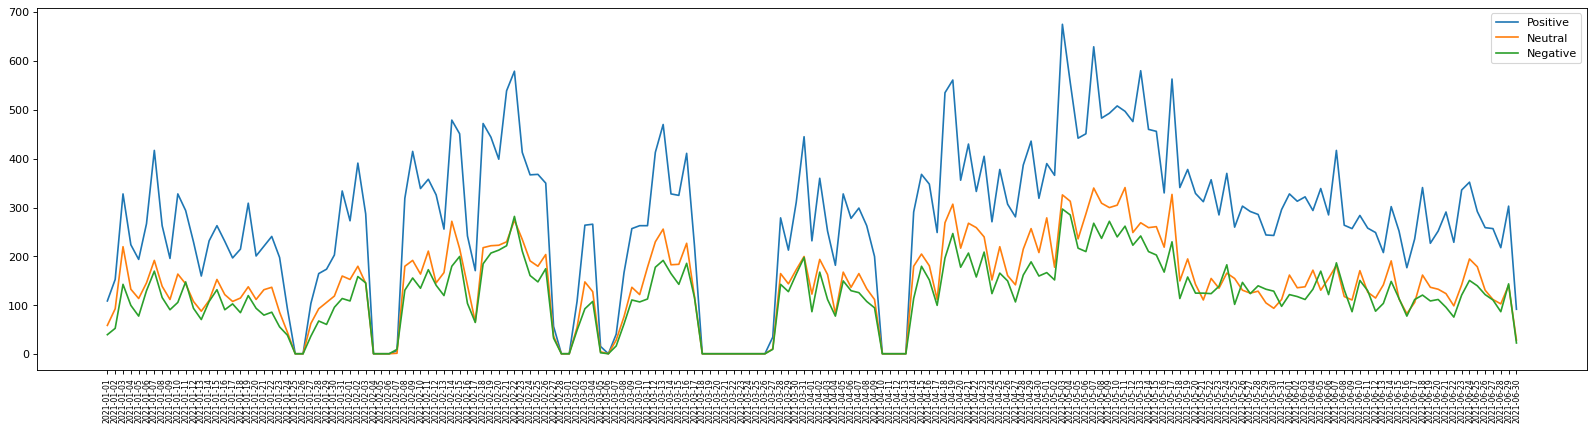

In [7]:
from matplotlib.pyplot import figure
figure(figsize = (25, 6), dpi = 80)
plt.plot(gdf.index,gdf['positive_comment'],label='Positive')
plt.plot(gdf.index,gdf['neutral_comment'],label='Neutral')
plt.plot(gdf.index,gdf['negative_comment'],label='Negative')
plt.legend(loc='upper right')
plt.xticks(fontsize=7,rotation=90)

In [ ]:
from sklearn import preprocessing
#x_array = np.array(gdf['price'])
normalized_arr = preprocessing.normalize(gdf)
gdfnormalized=pd.DataFrame(normalized_arr,index=gdf.index)

gdfnormalized=gdfnormalized.rename(columns={0:'price',1:'positive_comment',2:'neutral_comment',3:'negative_comment'})
gdfnormalized.head()
gdf['nprice']=gdfnormalized[0]
print(normalized_arr)

## exploratory functions

In [8]:
# descriptive statistics
def descriptive_statistics(df, series):
    stats = df[series].describe()    
    print('\nDescriptive Statistics for', '\'' + series + '\'', '\n\n', stats)

In [9]:
# create graphics function
def get_graphics(df, series, xlabel, ylabel, title, grid = True):
    plt.plot(pd.to_datetime(df.index), df[series])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(grid)
    return plt.show()

## stationary tests

unit root = statistical properties of series are not constant with time.

In order to be stationary, series has to be constant with time. So if a series has a unit root, it is not stationary

- strict stationary = mean, variance, covariance are not function of time
- trend stationary = no root unit, but has a trend. if you remove the trend, it would be strict stationary
- difference stationary = series can be made strict stationary by differencing

## ADF Augmented Dickey Fuller Test (unit root test)

null hypothesis = series has a unit root (a = 1)<br>
alt hypothesis = series has no unit root

accept null = t-score is greter than critical value (there is a unit root)<br>
reject null = t-score is less than critical value (there is no unit root)

accpet null = bad (not stationary)<br>
reject null = good (stationary)

adf can be interpreted as a difference stationary test

In [10]:
# ADF Augmented Dickey Fuller Test
def adf_test(df, series):
    results = adfuller(df[series])
    output = pd.Series(results[0:4], index = ['t-score', 'p-value', '# of lags used', '# of observations'])
    for key, value in results[4].items():
        output['critical value (%s)' %key] = value
    # if t-score < critical value at 5%, the data is stationary
    # if t-score > critical value at 5%, the data is NOT stationary
    if output[0] < output[5]:
        print('\nADF: The data', '\'' + series + '\'', 'is STATIONARY \n\n', output)
    elif output[0] > output[5]:
        print('\nADF: The data', '\'' + series + '\'', 'is NOT STATIONARY \n\n', output)
    else:
        print('\nADF: There is something wrong with', '\'' + series + '\'','\n\n', output)

## KPSS Kwiatkowski-Phillips-Schmidt-Shin Test (stationary test)

null hypothesis = the series has a stationary trend<br>
alt hypothesis = the series has a unit root (series is not stationary)

accept null = t-score is less than critical value (series is stationary) <br>
reject null = t-score is greater than the critical value (series is not stationary)

accpet null = good (stationary)<br>
reject null = bad (not stationary)

kpss classifies a series as stationary on the absence of a unit root<br>
(both strict stationary and trend stationary will be classified as stationary)

In [11]:
# KPSS Kwiatkowski-Phillips-Schmidt-Shin Test (stationary test)
def kpss_test(df, series):
    results = kpss(df[series], regression = 'ct')
    output = pd.Series(results[0:3], index = ['t-score', 'p-value', '# lags used'])              
    for key, value in results[3].items():
        output['critical value (%s)' %key] = value
    # if t-score < critical value at 5%, the data is stationary
    # if t-score > critical value at 5%, the data is NOT stationary
    if output[0] < output[4]:
        print('\nKPSS: The data', '\'' + series + '\'', 'is STATIONARY \n\n', output)
    elif output[0] > output[4]:
        print('\nKPSS: The data', '\'' + series + '\'', 'is NOT STATIONARY \n\n', output)
    else:
        print('\nKPSS: There is something wrong with', '\'' + series + '\'', '\n\n', output)

Many times, adf and kpss can give conflicting results. if so:

1. [adf = stationary], [kpss = stationary] = series is stationary
2. [adf = stationary], [kpss = NOT stationary] = series is difference stationary. use differencing to make it stationary
3. [adf = NOT stationary], [kpss = stationary] = series is trend stationary. remove trend to make strict stationary
4. [adf = NOT STATIONARY], [kpss = NOT STATIONARY] = series is not stationary

## everything combined

In [12]:
# all functions above in one
def series_analysis(df, series, xlabel, ylabel, title, grid = True):
    # descriptive stats
    descriptive_statistics(df, series)
    # graphics
    get_graphics(df, series, xlabel, ylabel, title, grid = True)
    # stationary tests
    adf_test(df, series)
    kpss_test(df, series)

# transforming variables

In [13]:
# create new df for stationary data
stationary = pd.DataFrame()

- ## price


Descriptive Statistics for 'price' 

 count     181.000000
mean     2072.083884
std       696.092008
min       730.367554
25%      1595.359253
50%      1924.685425
75%      2431.946533
max      4168.701172
Name: price, dtype: float64


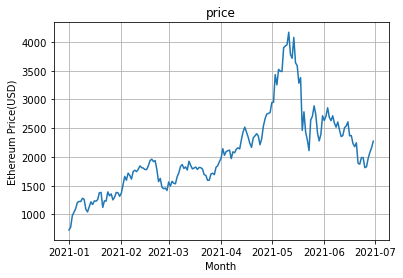


ADF: The data 'price' is NOT STATIONARY 

 t-score                  -1.856801
p-value                   0.352648
# of lags used           12.000000
# of observations       168.000000
critical value (1%)      -3.469886
critical value (5%)      -2.878903
critical value (10%)     -2.576027
dtype: float64

KPSS: The data 'price' is STATIONARY 

 t-score                   0.134001
p-value                   0.072221
# lags used              14.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


In [29]:
# ['price'] 
series_analysis(df, 'price', xlabel = 'Month', ylabel = 'Ethereum Price(USD)', title = 'price')


Descriptive Statistics for 'price' 

 count    180.000000
mean       0.006311
std        0.067811
min       -0.317459
25%       -0.030475
50%        0.007953
75%        0.049476
max        0.230695
Name: price, dtype: float64


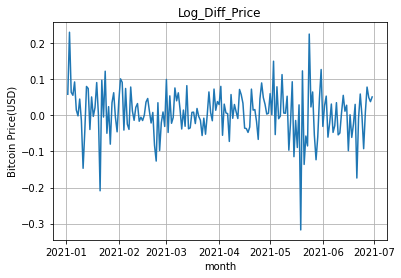


ADF: The data 'price' is STATIONARY 

 t-score                  -4.083161
p-value                   0.001032
# of lags used           11.000000
# of observations       168.000000
critical value (1%)      -3.469886
critical value (5%)      -2.878903
critical value (10%)     -2.576027
dtype: float64

KPSS: The data 'price' is STATIONARY 

 t-score                   0.058438
p-value                   0.100000
# lags used              14.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


,price,volatility,volume_price,volume_number,positive_comment,neutral_comment,negative_comment
Date,,,,,,,
2021-01-02,0.058715,0.048417,0.368800,6.795292e+06,0.339090,0.455062,0.281412
2021-01-03,0.230695,0.152220,0.828421,2.084807e+07,0.762576,0.861028,0.992553
2021-01-04,0.064242,-0.009336,0.230996,8.408167e+06,-0.381368,-0.503278,-0.357674
2021-01-05,0.055871,-0.101968,-0.315544,-1.698376e+07,-0.143788,-0.154151,-0.248461
2021-01-06,0.092915,-0.009316,0.073413,-7.292737e+05,0.319390,0.247408,0.510826


In [35]:
# ['price'] = log & diff
stationary['price'] = df['price'].apply(np.log).diff().dropna()
# run tests to see if stationary
series_analysis(stationary, 'price', xlabel = 'month', ylabel = 'Bitcoin Price(USD)', title = 'Log_Diff_Price')

stationary.head()

- ## volatility


Descriptive Statistics for 'volatility' 

 count    181.000000
mean       0.099708
std        0.066239
min        0.021007
25%        0.060392
50%        0.088684
75%        0.121274
max        0.603685
Name: volatility, dtype: float64


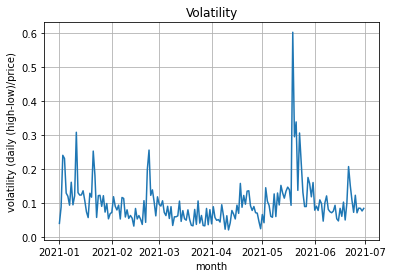


ADF: The data 'volatility' is STATIONARY 

 t-score                  -5.338366
p-value                   0.000005
# of lags used            1.000000
# of observations       179.000000
critical value (1%)      -3.467420
critical value (5%)      -2.877826
critical value (10%)     -2.575452
dtype: float64

KPSS: The data 'volatility' is STATIONARY 

 t-score                   0.132635
p-value                   0.074749
# lags used              14.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


In [34]:
# ['volatility']
series_analysis(df, 'volatility', xlabel = 'month', ylabel = 'volatility (daily (high-low)/price)', title = 'Volatility')


Descriptive Statistics for 'volatility' 

 count    180.000000
mean       0.000246
std        0.069726
min       -0.308129
25%       -0.032655
50%       -0.007055
75%        0.031518
max        0.510178
Name: volatility, dtype: float64


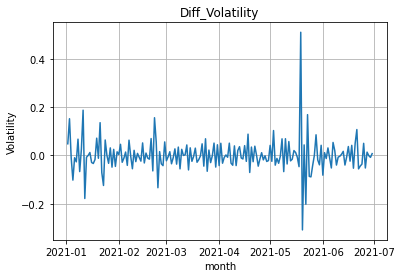


ADF: The data 'volatility' is STATIONARY 

 t-score                -1.019728e+01
p-value                 6.099561e-18
# of lags used          3.000000e+00
# of observations       1.760000e+02
critical value (1%)    -3.468062e+00
critical value (5%)    -2.878106e+00
critical value (10%)   -2.575602e+00
dtype: float64

KPSS: The data 'volatility' is STATIONARY 

 t-score                   0.046879
p-value                   0.100000
# lags used              14.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


,price,volatility,volume_price,volume_number,positive_comment,neutral_comment,negative_comment
Date,,,,,,,
2021-01-02,0.058715,0.048417,0.368800,6.795292e+06,0.339090,0.455062,0.281412
2021-01-03,0.230695,0.152220,0.828421,2.084807e+07,0.762576,0.861028,0.992553
2021-01-04,0.064242,-0.009336,0.230996,8.408167e+06,-0.381368,-0.503278,-0.357674
2021-01-05,0.055871,-0.101968,-0.315544,-1.698376e+07,-0.143788,-0.154151,-0.248461
2021-01-06,0.092915,-0.009316,0.073413,-7.292737e+05,0.319390,0.247408,0.510826


In [33]:
# ['volatility'] = diff
stationary['volatility'] = df['volatility'].diff().dropna()
# run tests to see if stationary
series_analysis(stationary, 'volatility',  xlabel = 'month', ylabel = 'Volatility', title = 'Diff_Volatility')

stationary.head()

- ## volume_price


Descriptive Statistics for 'volume_price' 

 count    1.810000e+02
mean     3.450019e+10
std      1.206012e+10
min      1.365200e+10
25%      2.515417e+10
50%      3.185423e+10
75%      4.157292e+10
max      8.448291e+10
Name: volume_price, dtype: float64


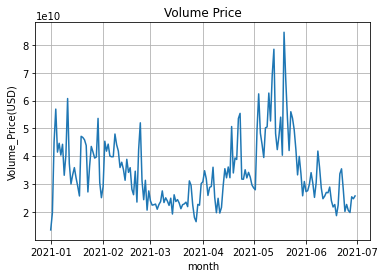


ADF: The data 'volume_price' is NOT STATIONARY 

 t-score                  -2.772681
p-value                   0.062283
# of lags used            3.000000
# of observations       177.000000
critical value (1%)      -3.467845
critical value (5%)      -2.878012
critical value (10%)     -2.575551
dtype: float64

KPSS: The data 'volume_price' is STATIONARY 

 t-score                   0.123764
p-value                   0.091178
# lags used              14.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


In [32]:
# ['volume_price']
series_analysis(df, 'volume_price', xlabel = 'month', ylabel = 'Volume_Price(USD)', title = 'Volume Price')


Descriptive Statistics for 'volume_price' 

 count    180.000000
mean       0.003542
std        0.231390
min       -0.560231
25%       -0.125615
50%       -0.010646
75%        0.129833
max        0.828421
Name: volume_price, dtype: float64


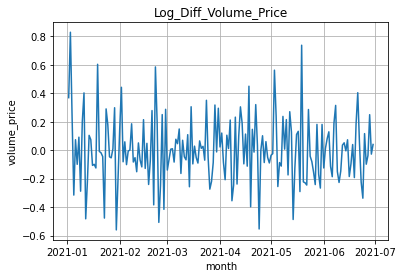


ADF: The data 'volume_price' is STATIONARY 

 t-score                -8.543005e+00
p-value                 9.669001e-14
# of lags used          5.000000e+00
# of observations       1.740000e+02
critical value (1%)    -3.468502e+00
critical value (5%)    -2.878298e+00
critical value (10%)   -2.575704e+00
dtype: float64

KPSS: The data 'volume_price' is STATIONARY 

 t-score                   0.088121
p-value                   0.100000
# lags used              14.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


,price,volatility,volume_price,volume_number,positive_comment,neutral_comment,negative_comment
Date,,,,,,,
2021-01-02,0.058715,0.048417,0.368800,6.795292e+06,0.339090,0.455062,0.281412
2021-01-03,0.230695,0.152220,0.828421,2.084807e+07,0.762576,0.861028,0.992553
2021-01-04,0.064242,-0.009336,0.230996,8.408167e+06,-0.381368,-0.503278,-0.357674
2021-01-05,0.055871,-0.101968,-0.315544,-1.698376e+07,-0.143788,-0.154151,-0.248461
2021-01-06,0.092915,-0.009316,0.073413,-7.292737e+05,0.319390,0.247408,0.510826


In [36]:
# ['volume_price'] = log & diff
stationary['volume_price'] =  df['volume_price'].apply(np.log).diff().dropna()
# run tests to see if stationary
series_analysis(stationary, 'volume_price',  xlabel = 'month', ylabel = 'volume_price', title = 'Log_Diff_Volume_Price')

stationary.head()

- ## volume_number


Descriptive Statistics for 'volume_number' 

 count    1.810000e+02
mean     1.818974e+07
std      8.625584e+06
min      8.614121e+06
25%      1.226866e+07
50%      1.471243e+07
75%      2.212359e+07
max      5.571150e+07
Name: volume_number, dtype: float64


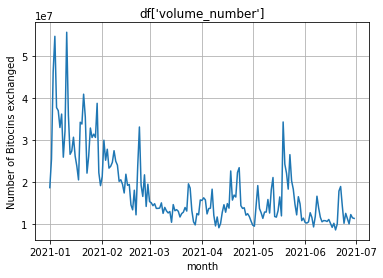


ADF: The data 'volume_number' is STATIONARY 

 t-score                  -2.897854
p-value                   0.045598
# of lags used            5.000000
# of observations       175.000000
critical value (1%)      -3.468280
critical value (5%)      -2.878202
critical value (10%)     -2.575653
dtype: float64

KPSS: The data 'volume_number' is NOT STATIONARY 

 t-score                   0.26101
p-value                   0.01000
# lags used              14.00000
critical value (10%)      0.11900
critical value (5%)       0.14600
critical value (2.5%)     0.17600
critical value (1%)       0.21600
dtype: float64


/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [37]:
# ['volume_number']
series_analysis(df, 'volume_number', xlabel = 'month', ylabel = 'Number of Bitocins exchanged', title = 'df[\'volume_number\']')


Descriptive Statistics for 'volume_number' 

 count    1.800000e+02
mean    -4.075953e+04
std      5.549645e+06
min     -1.977766e+07
25%     -2.437604e+06
50%     -3.008596e+05
75%      2.145815e+06
max      2.353321e+07
Name: volume_number, dtype: float64


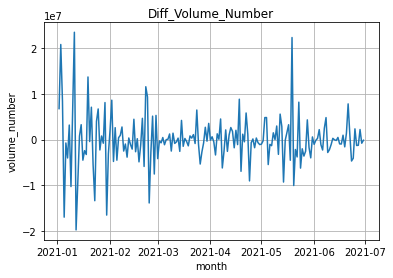


ADF: The data 'volume_number' is STATIONARY 

 t-score                -8.552500e+00
p-value                 9.142832e-14
# of lags used          6.000000e+00
# of observations       1.730000e+02
critical value (1%)    -3.468726e+00
critical value (5%)    -2.878396e+00
critical value (10%)   -2.575756e+00
dtype: float64

KPSS: The data 'volume_number' is STATIONARY 

 t-score                   0.069089
p-value                   0.100000
# lags used              14.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


,price,volatility,volume_price,volume_number,positive_comment,neutral_comment,negative_comment
Date,,,,,,,
2021-01-02,0.058715,0.048417,0.368800,6.795292e+06,0.339090,0.455062,0.281412
2021-01-03,0.230695,0.152220,0.828421,2.084807e+07,0.762576,0.861028,0.992553
2021-01-04,0.064242,-0.009336,0.230996,8.408167e+06,-0.381368,-0.503278,-0.357674
2021-01-05,0.055871,-0.101968,-0.315544,-1.698376e+07,-0.143788,-0.154151,-0.248461
2021-01-06,0.092915,-0.009316,0.073413,-7.292737e+05,0.319390,0.247408,0.510826


In [38]:
# ['volume_number'] = diff
stationary['volume_number'] = df['volume_number'].diff().dropna()
# run tests to see if stationary
series_analysis(stationary, 'volume_number',  xlabel = 'month', ylabel = 'volume_number', title = 'Diff_Volume_Number')

stationary.head()

- ## positive_comment


Descriptive Statistics for 'positive_comment' 

 count    181.000000
mean     273.469613
std      149.860066
min        1.000000
25%      203.000000
50%      284.000000
75%      358.000000
max      675.000000
Name: positive_comment, dtype: float64


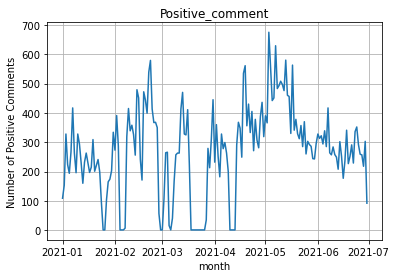


ADF: The data 'positive_comment' is STATIONARY 

 t-score                  -5.187478
p-value                   0.000009
# of lags used            0.000000
# of observations       180.000000
critical value (1%)      -3.467211
critical value (5%)      -2.877735
critical value (10%)     -2.575403
dtype: float64

KPSS: The data 'positive_comment' is STATIONARY 

 t-score                   0.084972
p-value                   0.100000
# lags used              14.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [40]:
# ['positive_comment']
series_analysis(df, 'positive_comment', xlabel = 'month', ylabel = 'Number of Positive Comments', title = 'Positive_comment')


Descriptive Statistics for 'positive_comment' 

 count    180.000000
mean      -0.000942
std        1.268238
min       -5.659482
25%       -0.203720
50%        0.000000
75%        0.209407
max        5.673323
Name: positive_comment, dtype: float64


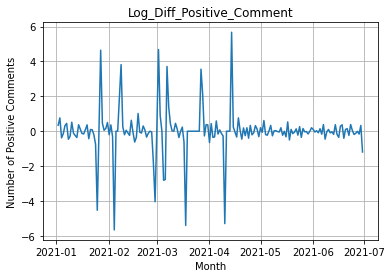


ADF: The data 'positive_comment' is STATIONARY 

 t-score                -6.883805e+00
p-value                 1.411309e-09
# of lags used          7.000000e+00
# of observations       1.720000e+02
critical value (1%)    -3.468952e+00
critical value (5%)    -2.878495e+00
critical value (10%)   -2.575809e+00
dtype: float64

KPSS: The data 'positive_comment' is STATIONARY 

 t-score                   0.043667
p-value                   0.100000
# lags used              14.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


,price,volatility,volume_price,volume_number,positive_comment,neutral_comment,negative_comment
Date,,,,,,,
2021-01-02,0.058715,0.048417,0.368800,6.795292e+06,0.339090,0.455062,0.281412
2021-01-03,0.230695,0.152220,0.828421,2.084807e+07,0.762576,0.861028,0.992553
2021-01-04,0.064242,-0.009336,0.230996,8.408167e+06,-0.381368,-0.503278,-0.357674
2021-01-05,0.055871,-0.101968,-0.315544,-1.698376e+07,-0.143788,-0.154151,-0.248461
2021-01-06,0.092915,-0.009316,0.073413,-7.292737e+05,0.319390,0.247408,0.510826


In [41]:
# ['positive_comment'] = log & diff 
stationary['positive_comment'] = df['positive_comment'].apply(np.log).diff().dropna()
# run tests to see if stationary
series_analysis(stationary, 'positive_comment', xlabel = 'Month', ylabel = 'Number of Positive Comments', title = 'Log_Diff_Positive_Comment')

stationary.head()

- ## neutral_comment


Descriptive Statistics for 'neutral_comment' 

 count    181.000000
mean     144.569061
std       83.207051
min        1.000000
25%      108.000000
50%      142.000000
75%      192.000000
max      341.000000
Name: neutral_comment, dtype: float64


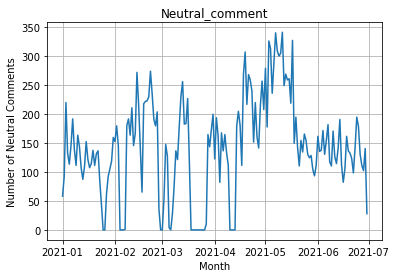


ADF: The data 'neutral_comment' is STATIONARY 

 t-score                  -4.963175
p-value                   0.000026
# of lags used            0.000000
# of observations       180.000000
critical value (1%)      -3.467211
critical value (5%)      -2.877735
critical value (10%)     -2.575403
dtype: float64

KPSS: The data 'neutral_comment' is STATIONARY 

 t-score                   0.091372
p-value                   0.100000
# lags used              14.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [43]:
# ['neutral_comment']
series_analysis(df, 'neutral_comment', xlabel = 'Month', ylabel = 'Number of Neutral Comments', title = 'Neutral_comment')


Descriptive Statistics for 'neutral_comment' 

 count    180.000000
mean      -0.003946
std        1.153542
min       -4.976734
25%       -0.207510
50%        0.000000
75%        0.210944
max        5.192957
Name: neutral_comment, dtype: float64


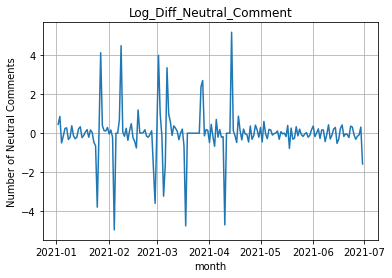


ADF: The data 'neutral_comment' is STATIONARY 

 t-score                -5.796461e+00
p-value                 4.739417e-07
# of lags used          1.400000e+01
# of observations       1.650000e+02
critical value (1%)    -3.470616e+00
critical value (5%)    -2.879221e+00
critical value (10%)   -2.576197e+00
dtype: float64

KPSS: The data 'neutral_comment' is STATIONARY 

 t-score                   0.046941
p-value                   0.100000
# lags used              14.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


,price,volatility,volume_price,volume_number,positive_comment,neutral_comment,negative_comment
Date,,,,,,,
2021-01-02,0.058715,0.048417,0.368800,6.795292e+06,0.339090,0.455062,0.281412
2021-01-03,0.230695,0.152220,0.828421,2.084807e+07,0.762576,0.861028,0.992553
2021-01-04,0.064242,-0.009336,0.230996,8.408167e+06,-0.381368,-0.503278,-0.357674
2021-01-05,0.055871,-0.101968,-0.315544,-1.698376e+07,-0.143788,-0.154151,-0.248461
2021-01-06,0.092915,-0.009316,0.073413,-7.292737e+05,0.319390,0.247408,0.510826


In [44]:
# ['neutral_comment'] = log & diff
stationary['neutral_comment'] = df['neutral_comment'].apply(np.log).diff().dropna()
# run tests to see if stationary
series_analysis(stationary, 'neutral_comment', xlabel = 'month', ylabel = 'Number of Neutral Comments', title = 'Log_Diff_Neutral_Comment')

stationary.head()

- ## negative_comment


Descriptive Statistics for 'negative_comment' 

 count    181.000000
mean     120.348066
std       69.120630
min        1.000000
25%       87.000000
50%      122.000000
75%      162.000000
max      297.000000
Name: negative_comment, dtype: float64


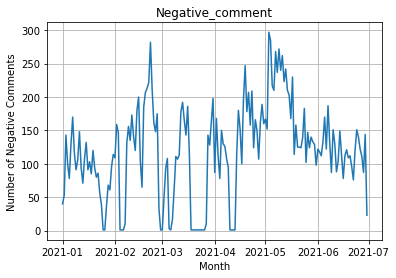


ADF: The data 'negative_comment' is STATIONARY 

 t-score                  -4.996890
p-value                   0.000023
# of lags used            0.000000
# of observations       180.000000
critical value (1%)      -3.467211
critical value (5%)      -2.877735
critical value (10%)     -2.575403
dtype: float64

KPSS: The data 'negative_comment' is STATIONARY 

 t-score                   0.086178
p-value                   0.100000
# lags used              14.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [45]:
# ['negative_comment']
series_analysis(df, 'negative_comment', xlabel = 'Month', ylabel = 'Number of Negative Comments', title = 'Negative_comment')


Descriptive Statistics for 'negative_comment' 

 count    180.000000
mean      -0.003074
std        1.095306
min       -4.983607
25%       -0.211802
50%        0.000000
75%        0.246046
max        4.736198
Name: negative_comment, dtype: float64


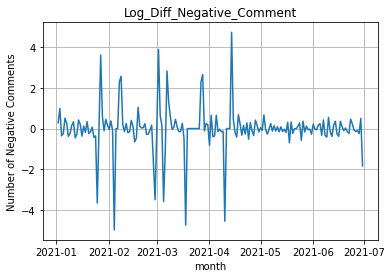


ADF: The data 'negative_comment' is STATIONARY 

 t-score                -9.085373e+00
p-value                 3.953436e-15
# of lags used          3.000000e+00
# of observations       1.760000e+02
critical value (1%)    -3.468062e+00
critical value (5%)    -2.878106e+00
critical value (10%)   -2.575602e+00
dtype: float64

KPSS: The data 'negative_comment' is STATIONARY 

 t-score                   0.04847
p-value                   0.10000
# lags used              14.00000
critical value (10%)      0.11900
critical value (5%)       0.14600
critical value (2.5%)     0.17600
critical value (1%)       0.21600
dtype: float64


/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/sowmyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


,price,volatility,volume_price,volume_number,positive_comment,neutral_comment,negative_comment
Date,,,,,,,
2021-01-02,0.058715,0.048417,0.368800,6.795292e+06,0.339090,0.455062,0.281412
2021-01-03,0.230695,0.152220,0.828421,2.084807e+07,0.762576,0.861028,0.992553
2021-01-04,0.064242,-0.009336,0.230996,8.408167e+06,-0.381368,-0.503278,-0.357674
2021-01-05,0.055871,-0.101968,-0.315544,-1.698376e+07,-0.143788,-0.154151,-0.248461
2021-01-06,0.092915,-0.009316,0.073413,-7.292737e+05,0.319390,0.247408,0.510826


In [46]:
# ['negative_comment'] = log & diff 
stationary['negative_comment'] = df['negative_comment'].apply(np.log).diff().dropna()
# run tests to see if stationary
series_analysis(stationary, 'negative_comment', xlabel = 'month', ylabel = 'Number of Negative Comments', title = 'Log_Diff_Negative_Comment')

stationary.head()

In [28]:
stationary.to_csv('stationary_data_all.csv')